In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("LVMUY.csv")
df

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA
0,2014-01-02,2014,1,2,<bound method PandasDelegate._add_delegate_acc...,0,2014-00,35.89,35.97,35.67,35.97,138600.0,27.41,0.000000,27.410000,27.4100
1,2014-01-03,2014,1,3,<bound method PandasDelegate._add_delegate_acc...,0,2014-00,35.77,35.77,35.56,35.57,89900.0,27.11,-0.011120,27.260000,27.2600
2,2014-01-06,2014,1,6,<bound method PandasDelegate._add_delegate_acc...,1,2014-01,35.20,35.20,34.94,35.10,82200.0,26.75,-0.013213,27.090000,27.0900
3,2014-01-07,2014,1,7,<bound method PandasDelegate._add_delegate_acc...,1,2014-01,34.77,34.80,34.54,34.75,75800.0,26.48,-0.009972,26.937500,26.9375
4,2014-01-08,2014,1,8,<bound method PandasDelegate._add_delegate_acc...,1,2014-01,34.32,34.35,34.10,34.18,104500.0,26.05,-0.016403,26.760000,26.7600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,2019-12-24,2019,12,24,<bound method PandasDelegate._add_delegate_acc...,51,2019-51,91.90,91.90,91.47,91.53,51600.0,87.42,-0.002072,85.540714,83.5206
1506,2019-12-26,2019,12,26,<bound method PandasDelegate._add_delegate_acc...,51,2019-51,92.06,92.73,91.54,92.26,57600.0,88.12,0.007976,85.825000,83.6842
1507,2019-12-27,2019,12,27,<bound method PandasDelegate._add_delegate_acc...,51,2019-51,93.12,93.59,93.02,93.31,99300.0,89.12,0.011381,86.146429,83.8778
1508,2019-12-30,2019,12,30,<bound method PandasDelegate._add_delegate_acc...,52,2019-52,93.40,93.40,92.74,93.07,59500.0,88.89,-0.002572,86.490714,84.0656


In [3]:
df_grouped = df.groupby(['Year', 'Week_Number'])['Return'].agg([np.mean,np.std])
df_grouped.reset_index(['Year', 'Week_Number'], inplace=True)
df_grouped.rename(columns={'mean': 'mean_Return_μ','std':'std_Return_σ'}, inplace=True)

In [4]:
def getWeeklyDifferences(df):
    lastClosePrice = np.asarray(df.groupby(["Year", "Week_Number"]).last()["Close"])
    firstOpenPrice = np.asarray(df.groupby(["Year", "Week_Number"]).first()["Open"])
    return lastClosePrice - firstOpenPrice
def getLabels(df):
    weeklyDifferences = getWeeklyDifferences(df)
    return [1 if x >= 0 else 0 for x in weeklyDifferences]

In [5]:
df_grouped['Weekly_Label']=getLabels(df)
df_grouped['WeeklyDif'] = getWeeklyDifferences(df)
df_grouped.dropna(inplace=True)
df_grouped

,Year,Week_Number,mean_Return_μ,std_Return_σ,Weekly_Label,WeeklyDif
0,2014,0,-0.005560,0.007863,0,-0.32
1,2014,1,-0.006661,0.017478,0,-0.82
2,2014,2,-0.000721,0.009552,0,-0.12
3,2014,3,-0.002957,0.018201,0,-1.31
4,2014,4,0.010164,0.022332,1,1.80
...,...,...,...,...,...,...
311,2019,48,-0.000431,0.012718,0,-0.54
312,2019,49,0.002777,0.006309,1,1.36
313,2019,50,0.002657,0.012763,0,-0.49
314,2019,51,0.006299,0.005811,1,1.81


In [6]:
df_train = df_grouped[df_grouped.Year == 2015]
df_pre = df_grouped[df_grouped.Year == 2016]

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

X_train, y_train = df_train[['mean_Return_μ', 'std_Return_σ']], df_train['Weekly_Label']
X_test, y_test = df_pre[['mean_Return_μ', 'std_Return_σ']], df_pre['Weekly_Label']

from sklearn.preprocessing import StandardScaler
#scale the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### LDA

In [8]:
lda = LDA()
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [9]:
#Question1 equation
lda.coef_

array([[2.38244519, 0.02483444]])

In [10]:
lda.intercept_

array([0.13874406])

In [11]:
from sklearn.metrics import accuracy_score
predict_lda = lda.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix(y_test, predict_lda)

array([[22,  1],
       [ 1, 28]], dtype=int64)

In [13]:
print(metrics.classification_report(y_test, predict_lda))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.97      0.97      0.97        29

    accuracy                           0.96        52
   macro avg       0.96      0.96      0.96        52
weighted avg       0.96      0.96      0.96        52



accuracy: 0.96 sencitive rate: 0.97 specificity rate: 0.96

### QDA

In [14]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
qda = QDA()
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [15]:
predict_qda = qda.predict(X_test)

In [16]:
confusion_matrix(y_test,predict_qda)

array([[18,  5],
       [ 4, 25]], dtype=int64)

In [17]:
print(metrics.classification_report(y_test, predict_qda))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        23
           1       0.83      0.86      0.85        29

    accuracy                           0.83        52
   macro avg       0.83      0.82      0.82        52
weighted avg       0.83      0.83      0.83        52



accuracy: 0.83   sensitive rate: 0.86  specificity rate: 0.78

### trading strategy

In [18]:
test = df[df.Year == 2016]
weeklyDifferences = getWeeklyDifferences(test)
weeklyOpens = test.groupby(["Year", "Week_Number"]).first().Open
weeklyCloses = test.groupby(["Year", "Week_Number"]).last().Close

percentGains = np.asarray((weeklyCloses - weeklyOpens) / weeklyOpens)
dailyPercentGains = np.asarray((test.Close - test.Open)/test.Open)

initialInvestment = 100
buyAndHold = [initialInvestment]

In [19]:
#Buy and Hold
#PercentGains are weekly so this will take of the weeks
labels = list(range(len(percentGains) + 1))

for pg in percentGains:
    buyAndHold.append(buyAndHold[-1] * (1 + pg)) if pg >= 0 else buyAndHold.append(buyAndHold[-1] / (1 - pg) )    

In [20]:
#lda portfolio
ldaPortfolio = [initialInvestment]

for index  in range(len(predict_lda)):
    pg = percentGains[index]
    if predict_lda[index] == 1:
        ldaPortfolio.append(ldaPortfolio[-1] * (1 + pg)) if pg >= 0 else ldaPortfolio.append(buyAndHold[-1] / (1 - pg) )  
    else:
        ldaPortfolio.append(ldaPortfolio[-1])

In [21]:
#qda portfolio
qdaPortfolio = [initialInvestment]

for index  in range(len(predict_qda)):
    pg = percentGains[index]
    if predict_qda[index] == 1:
        qdaPortfolio.append(qdaPortfolio[-1] * (1 + pg)) if pg >= 0 else qdaPortfolio.append(buyAndHold[-1] / (1 - pg) )  
    else:
        qdaPortfolio.append(qdaPortfolio[-1])

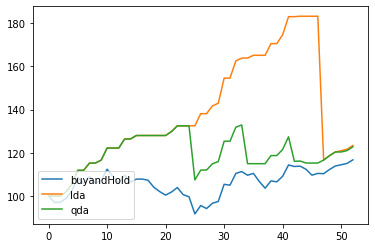

In [22]:
import matplotlib.pyplot as plt
plt.plot(labels, buyAndHold)
plt.plot(labels, ldaPortfolio, label = "lda")
plt.plot(labels, qdaPortfolio, label = 'qda')
plt.legend(["buyandHold", "lda", "qda"], loc ="lower left")

    The LDA strategy has the best performance. Also, the accuracy of LDA is higher than QDA in this stock.